In [1]:
import urllib.request
import requests

import pandas_datareader.data as web
import numpy as np 
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt 
import seaborn as sns
import datetime as dt
plt.style.use('ggplot')
%matplotlib inline

In [2]:
# get fng data from api
get_fng_index = "https://api.alternative.me/fng/?limit=10000&format=csv&date_format=us"
url = get_fng_index 

In [3]:
urllib.request.urlretrieve(url, 'btc_fng.csv')

('btc_fng.csv', <http.client.HTTPMessage at 0x7ffe3cbe5ee0>)

In [4]:
df = pd.read_csv('btc_fng.csv', skiprows=3) 

df.head()

,fng_value,fng_classification,date
0,02-28-2021,55.0,Greed
1,02-27-2021,56.0,Greed
2,02-26-2021,55.0,Greed
3,02-25-2021,79.0,Extreme Greed
4,02-24-2021,76.0,Extreme Greed


In [5]:
df = df[:1118]

In [6]:
df = df.rename(columns = {'fng_value':'Date', 'fng_classification':'fng_value', 'date':'fng_classification'})
df

,Date,fng_value,fng_classification
0,02-28-2021,55.0,Greed
1,02-27-2021,56.0,Greed
2,02-26-2021,55.0,Greed
3,02-25-2021,79.0,Extreme Greed
4,02-24-2021,76.0,Extreme Greed
...,...,...,...
1113,02-08-2018,30.0,Fear
1114,02-07-2018,36.0,Fear
1115,02-06-2018,8.0,Extreme Fear
1116,02-05-2018,11.0,Extreme Fear


In [7]:
df['Date'] = pd.to_datetime(df['Date'])

In [8]:
df = df.set_index('Date')

In [9]:
df.sort_index(inplace=True) # Sort index 

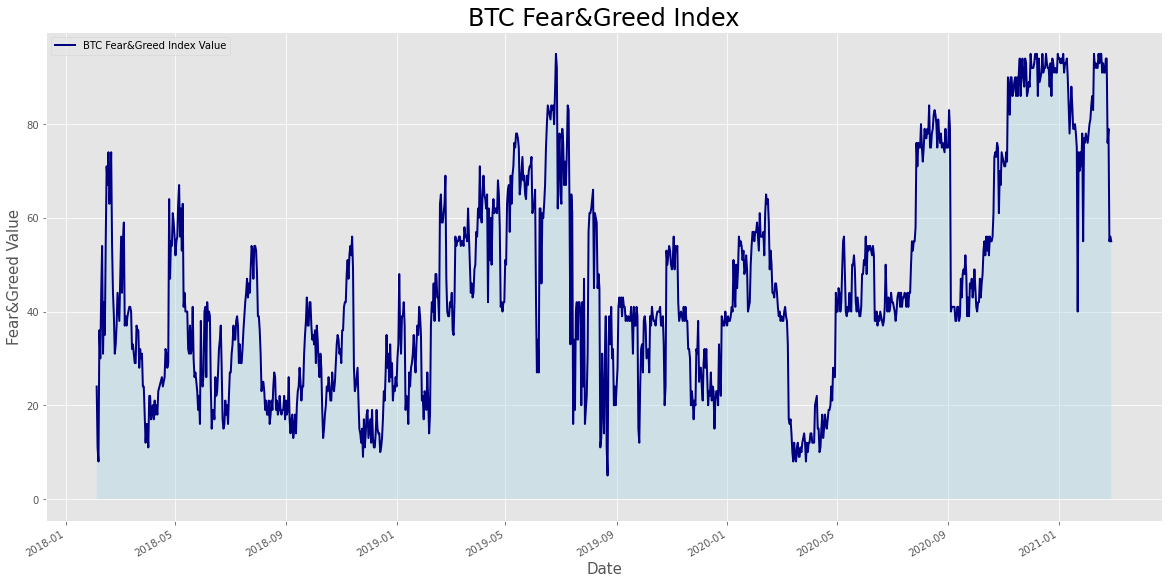

In [10]:
f, ax = plt.subplots(figsize=(20,10))

df['fng_value'].plot(color = 'navy', lw = 2, label = 'BTC Fear&Greed Index Value')
ax.fill_between(df.index, df['fng_value'],  facecolor ='lightblue', alpha = 0.4) 
ax.set_title('BTC Fear&Greed Index', fontsize=24)
ax.set_ylabel('Fear&Greed Value', fontsize=15)
ax.set_xlabel('Date', fontsize=15)
ax.legend()

Text(0, 0.5, 'Frequency')

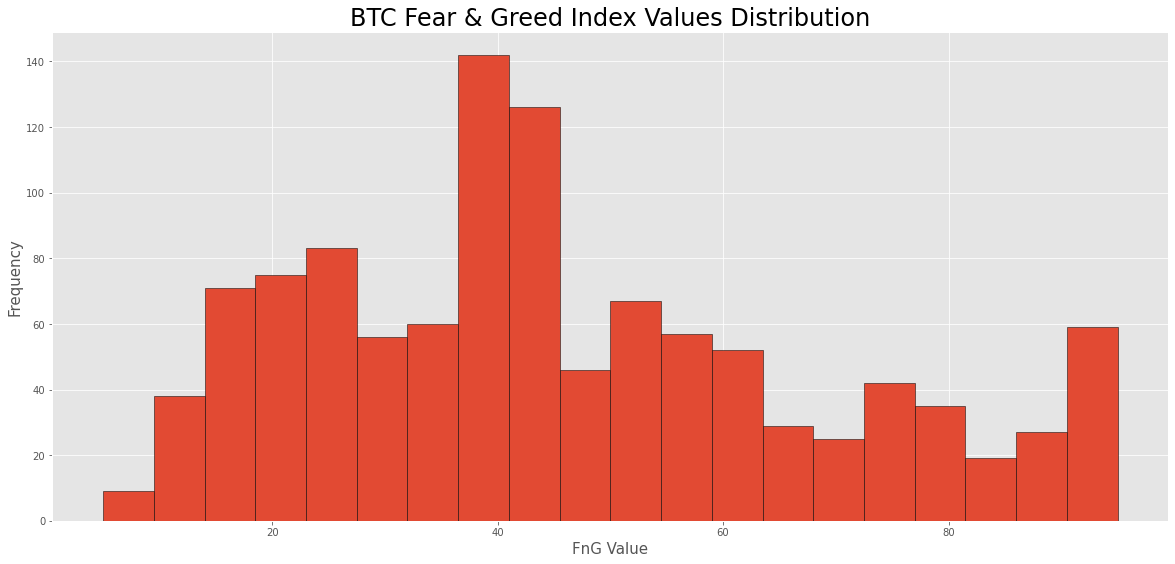

In [11]:
df.hist(bins=20, figsize=(20,9), edgecolor='black')
plt.title('BTC Fear & Greed Index Values Distribution', fontsize=24)
plt.xlabel('FnG Value', fontsize=15)
plt.ylabel('Frequency', fontsize=15)

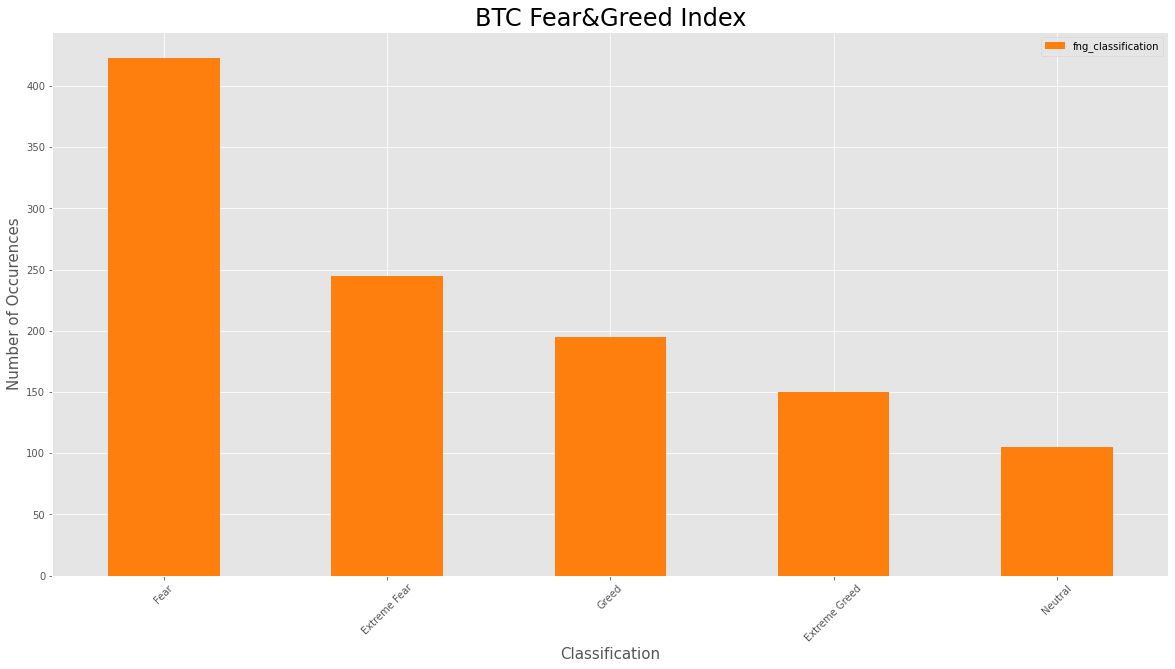

In [12]:
f, ax = plt.subplots(figsize=(20,10))

df['fng_classification'].value_counts().plot(kind='bar', color = 'tab:orange')
ax.set_title('BTC Fear&Greed Index', fontsize=24)
ax.set_ylabel('Number of Occurences', fontsize=15)
ax.set_xlabel('Classification', fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.legend()

In [13]:
df1 = df[['fng_value']]
df1

,fng_value
Date,
2018-02-04,24.0
2018-02-05,11.0
2018-02-06,8.0
2018-02-07,36.0
2018-02-08,30.0
...,...
2021-02-24,76.0
2021-02-25,79.0
2021-02-26,55.0


In [14]:
#import hist. btc data since 

btc = web.DataReader('BTC-USD', data_source = 'yahoo', start='2018-02-01')
btc

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-02-01,10288.799805,8812.280273,10237.299805,9170.540039,9.959400e+09,9170.540039
2018-02-02,9142.280273,7796.490234,9142.280273,8830.750000,1.272690e+10,8830.750000
2018-02-03,9430.750000,8251.629883,8852.120117,9174.910156,7.263790e+09,9174.910156
2018-02-04,9334.870117,8031.220215,9175.700195,8277.009766,7.073550e+09,8277.009766
2018-02-05,8364.839844,6756.680176,8270.540039,6955.270020,9.285290e+09,6955.270020
...,...,...,...,...,...,...
2021-02-23,54204.929688,45290.589844,54204.929688,48824.425781,1.061025e+11,48824.425781
2021-02-24,51290.136719,47213.500000,48835.085938,49705.332031,6.369552e+10,49705.332031
2021-02-25,51948.968750,47093.851562,49709.082031,47093.851562,5.450657e+10,47093.851562


In [15]:
df1 = df1.join(btc['Close'], how="inner")
df1

,fng_value,Close
Date,,
2018-02-04,24.0,8277.009766
2018-02-05,11.0,6955.270020
2018-02-06,8.0,7754.000000
2018-02-07,36.0,7621.299805
2018-02-08,30.0,8265.589844
...,...,...
2021-02-23,94.0,48824.425781
2021-02-24,76.0,49705.332031
2021-02-25,79.0,47093.851562


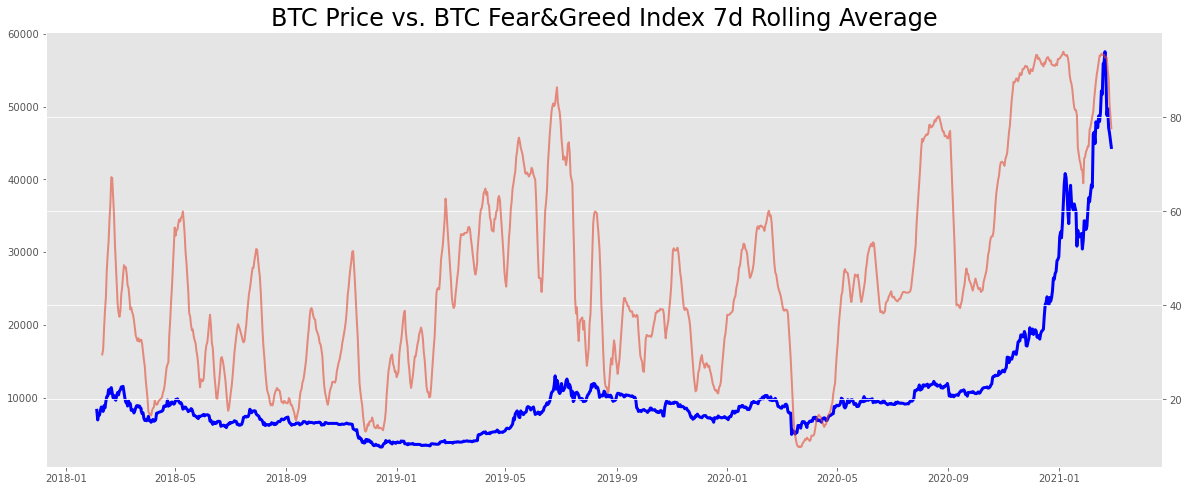

In [16]:
f, ax = plt.subplots(figsize=(20,8))

ax.plot(df1['Close'], color = 'blue', lw=3, label = 'BTC Log Price')
ax.grid(False)
ax = ax.twinx()
# ax.plot(df1['fng_value'], alpha=0.6, lw = 2)
ax.plot(df1['fng_value'].rolling(7).mean(), alpha=0.6, lw =2, label = '7D (weekly) Rolling Average')

ax.set_title('BTC Price vs. BTC Fear&Greed Index 7d Rolling Average', fontsize=24)

plt.show()

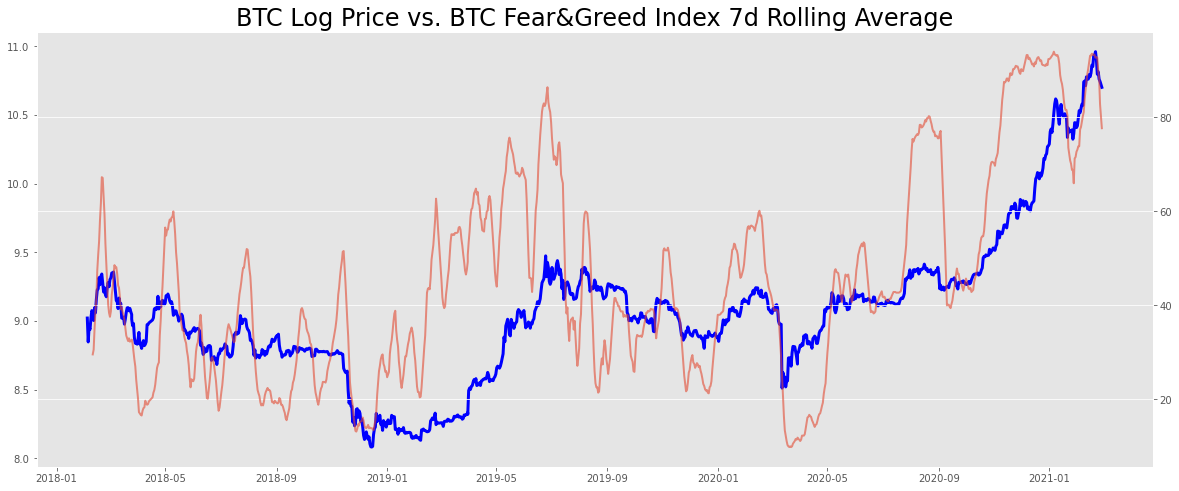

In [17]:
f, ax = plt.subplots(figsize=(20,8))

ax.plot(df1['Close'].apply(np.log), color = 'blue', lw=3, label = 'BTC Log Price')
ax.grid(False)
ax = ax.twinx()
# ax.plot(df1['fng_value'], alpha=0.6, lw = 2)
ax.plot(df1['fng_value'].rolling(7).mean(), alpha=0.6, lw =2, label = '7D (weekly) Rolling Average')

ax.set_title('BTC Log Price vs. BTC Fear&Greed Index 7d Rolling Average', fontsize=24)

plt.show()

In [23]:
df2 = df1.copy()

In [24]:
df2['Close'] = df2['Close'].apply(np.log)

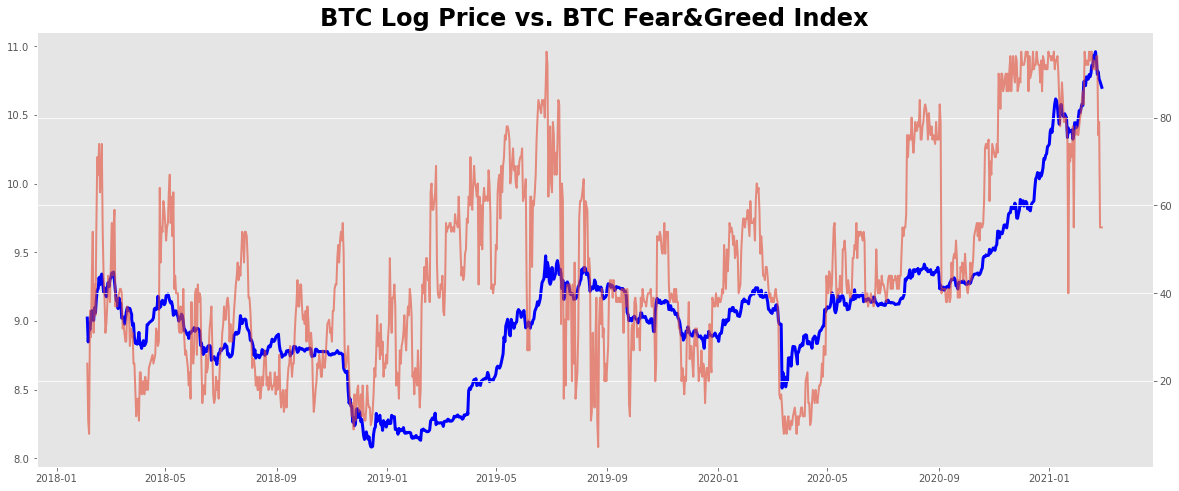

In [25]:
# Comparing both on log scale 

f, ax = plt.subplots(figsize=(20,8))

ax.plot(df2['Close'], color = 'blue', lw=3, label = 'BTC Log Price')
ax.grid(False)
ax = ax.twinx()
ax.plot(df1['fng_value'], alpha=0.6, lw = 2)
# ax.plot(df2['fng_value'].rolling(7).mean(), alpha=0.6, lw =2, label = '7D (weekly) Rolling Average')

ax.set_title('BTC Log Price vs. BTC Fear&Greed Index', fontsize=24, fontweight='bold')

plt.show()

In [21]:
corr = df2.corr()
corr.style.background_gradient(cmap='RdYlGn').set_precision(2)

,fng_value,Close
fng_value,1.00,0.57
Close,0.57,1.00


Text(0.5, 1.0, 'Regression Plot (LOG) BTC Close vs. Fear&Greed Value')

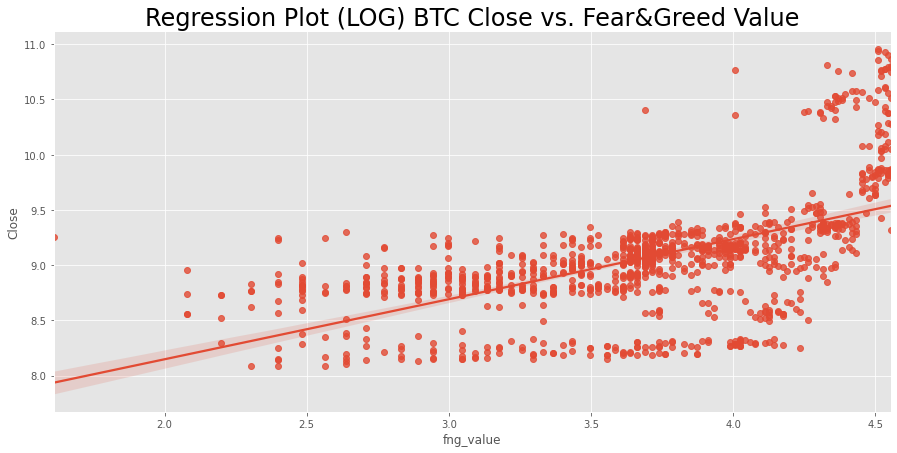

In [22]:
plt.figure(figsize=(15,7))
sns.regplot(x="fng_value",y="Close",data=df2)
plt.title('Regression Plot (LOG) BTC Close vs. Fear&Greed Value', fontsize=24)

In [26]:
df2 = df2.loc['2020-01-01':]

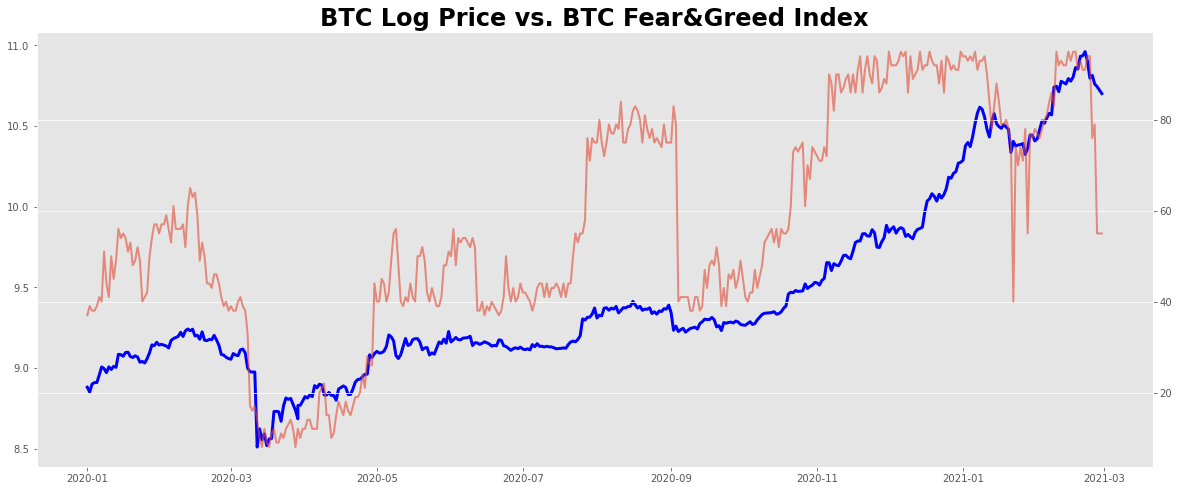

In [27]:
# Comparing both on log scale 

f, ax = plt.subplots(figsize=(20,8))

ax.plot(df2['Close'], color = 'blue', lw=3, label = 'BTC Log Price')
ax.grid(False)
ax = ax.twinx()
ax.plot(df2['fng_value'], alpha=0.6, lw = 2)
# ax.plot(df2['fng_value'].rolling(7).mean(), alpha=0.6, lw =2, label = '7D (weekly) Rolling Average')

ax.set_title('BTC Log Price vs. BTC Fear&Greed Index', fontsize=24, fontweight='bold')

plt.show()

In [30]:
df2.corr()

,fng_value,Close
fng_value,1.000000,0.801179
Close,0.801179,1.000000


Text(0.5, 1.0, 'Regression Plot (LOG) BTC Close vs. Fear&Greed Value')

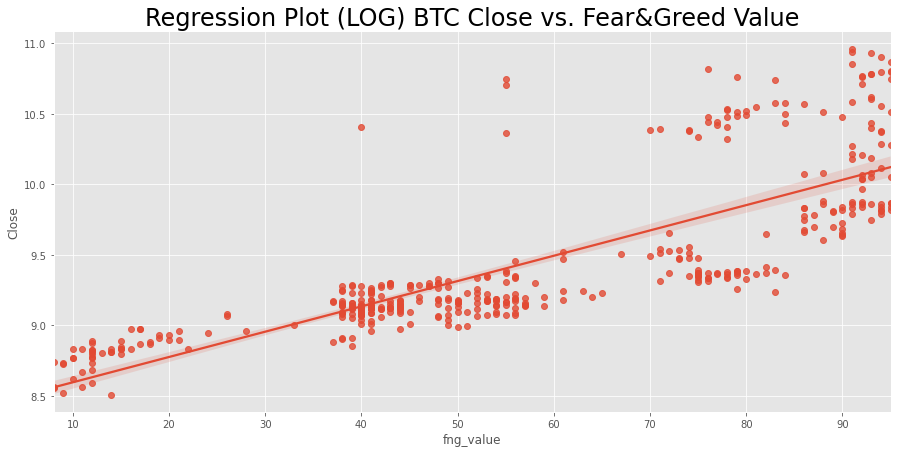

In [31]:
plt.figure(figsize=(15,7))
sns.regplot(x="fng_value",y="Close",data=df2)
plt.title('Regression Plot (LOG) BTC Close vs. Fear&Greed Value', fontsize=24)